<a href="https://colab.research.google.com/github/neelamku/DNN-ttH/blob/main/rnn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot3
!pip install uproot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
import numpy as np
import pandas as pd
import json
import os
import uproot3
import uproot

#root to arrays

tree = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_comb.root")["nominal_Loose_new"]
tree1 = uproot3.open("/content/drive/MyDrive/Colab Notebooks/rnn_rewg_latest.root")["nominal_Loose_new"]

m_truthpt_weights = tree1["truthpt_weights"].array()

m_higgs_truthPt = tree["higgs_truthPt"].array()
m_comb_higgs_truthPt = tree["comb_higgs_truthPt"].array()
m_best_higgs_Pt = tree["best_higgs_Pt"].array()
m_comb_best_higgs_Pt = tree["comb_best_higgs_Pt"].array()
m_best_higgs_Pt_withH = tree["best_higgs_Pt_withH"].array()
m_comb_best_higgs_Pt_withH = tree["comb_best_higgs_Pt_withH"].array()

m_nBTags_DL1r85 = tree["nBTags_DL1r85"].array()
m_nBTags_DL1r70 = tree["nBTags_DL1r70"].array()

m_higgs_pt = tree["comb_higgs_pt"].array()
m_higgs_mass = tree["comb_higgs_mass"].array()
m_hadW_mass = tree["comb_hadW_mass"].array()
m_hadtop_mass = tree["comb_hadtop_mass"].array()
m_leptop_mass = tree["comb_leptop_mass"].array()
m_hadWblepTop_mass = tree["comb_hadWblepTop_mass"].array()
m_minbhadTopqhadW_dR = tree["comb_minbhadTopqhadW_dR"].array()
m_hadWblepTop_dR = tree["comb_hadWblepTop_dR"].array()
m_blepTopbhadTop_dR = tree["comb_blepTopbhadTop_dR"].array()
m_bhadTopq2hadW_dR = tree["comb_bhadTopq2hadW_dR"].array()
m_hadWbhadTop_dR = tree["comb_hadWbhadTop_dR"].array()
m_Higgsq1hadW_mass = tree["comb_Higgsq1hadW_mass"].array()
m_bbHiggs_dR = tree["comb_bbHiggs_dR"].array()
m_bhadTopq1hadW_dR = tree["comb_bhadTopq1hadW_dR"].array()
m_qqhadW_dR = tree["comb_qqhadW_dR"].array()
m_diff_mindRbhadTopqhadW_dRlepblepTop = tree["comb_diff_mindRbhadTopqhadW_dRlepblepTop"].array()
m_lepbhadTop_dR = tree["comb_lepbhadTop_dR"].array()
m_lepb1Higgs_dR = tree["comb_lepb1Higgs_dR"].array()
m_lepWbhadTop_mass = tree["comb_lepWbhadTop_mass"].array()
m_lepblepTop_dR = tree["comb_lepblepTop_dR"].array()

In [ ]:
#prepare data###

in_higgs_truthPt = []
in_best_higgs_Pt_withH = []

#20 variables for input

varList = []
in_higgs_pt = []
in_higgs_mass = []
in_hadW_mass = []
in_hadtop_mass = []
in_leptop_mass = []
in_hadWblepTop_mass = []
in_minbhadTopqhadW_dR = []
in_hadWblepTop_dR = []
in_blepTopbhadTop_dR = []
in_bhadTopq2hadW_dR = []
in_hadWbhadTop_dR = []
in_Higgsq1hadW_mass = []
in_bbHiggs_dR = []
in_bhadTopq1hadW_dR = []
in_qqhadW_dR = []
in_diff_mindRbhadTopqhadW_dRlepblepTop = []
in_lepbhadTop_dR = []
in_lepb1Higgs_dR = []
in_lepWbhadTop_mass = []
in_lepblepTop_dR = []


### BTag selections
in_nBTags_DL1r85 = []
in_nBTags_DL1r70 = []

### Truth pT weights
in_truthpt_weights = []

### count 
pass_no = 0
count = []

### put selections and fill only those events

for i in range(0,len(m_higgs_truthPt)):
  if (m_higgs_truthPt[i]>0): 
   if (m_nBTags_DL1r70[i]>=4):
    if (len(m_higgs_pt[i])>0): #select events with 12/24 combinations

      pass_no = pass_no + 1
      count.append(pass_no)

      ###fill inputs here

      in_higgs_truthPt.append(m_higgs_truthPt[i])
      in_best_higgs_Pt_withH.append(m_best_higgs_Pt_withH[i])
  
      ###

      in_higgs_pt.append(m_higgs_pt[i])
      in_higgs_mass.append(m_higgs_mass[i])
      in_hadW_mass.append(m_hadW_mass[i])
      in_hadtop_mass.append(m_hadtop_mass[i])
      in_leptop_mass.append(m_leptop_mass[i])
      in_hadWblepTop_mass.append(m_hadWblepTop_mass[i])
      in_minbhadTopqhadW_dR.append(m_minbhadTopqhadW_dR[i])
      in_hadWblepTop_dR.append(m_hadWblepTop_dR[i])
      in_blepTopbhadTop_dR.append(m_blepTopbhadTop_dR[i])
      in_bhadTopq2hadW_dR.append(m_bhadTopq2hadW_dR[i])
      in_hadWbhadTop_dR.append(m_hadWbhadTop_dR[i])
      in_Higgsq1hadW_mass.append(m_Higgsq1hadW_mass[i])
      in_bbHiggs_dR.append(m_bbHiggs_dR[i])
      in_bhadTopq1hadW_dR.append(m_bhadTopq1hadW_dR[i])
      in_qqhadW_dR.append(m_qqhadW_dR[i])
      in_diff_mindRbhadTopqhadW_dRlepblepTop.append(m_diff_mindRbhadTopqhadW_dRlepblepTop[i])
      in_lepbhadTop_dR.append(m_lepbhadTop_dR[i])
      in_lepb1Higgs_dR.append(m_lepb1Higgs_dR[i])
      in_lepWbhadTop_mass.append(m_lepWbhadTop_mass[i])
      in_lepblepTop_dR.append(m_lepblepTop_dR[i])
         
      ###
      
      in_truthpt_weights.append(m_truthpt_weights[i])

a1 = len(count)
print (a1)

73094


In [ ]:
#make fixed length for inputs

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

varOrder = [in_higgs_pt,in_higgs_mass,in_hadW_mass,in_hadtop_mass,in_leptop_mass,in_hadWblepTop_mass,in_minbhadTopqhadW_dR,in_hadWblepTop_dR,in_blepTopbhadTop_dR,in_bhadTopq2hadW_dR,in_hadWbhadTop_dR,in_Higgsq1hadW_mass,in_bbHiggs_dR,in_bhadTopq1hadW_dR,in_qqhadW_dR,in_diff_mindRbhadTopqhadW_dRlepblepTop,in_lepbhadTop_dR,in_lepb1Higgs_dR,in_lepWbhadTop_mass,in_lepblepTop_dR]
padded_input = []

for j in range(0,len(varOrder)):
  padded_input.append(tf.keras.preprocessing.sequence.pad_sequences(varOrder[j], padding="post",dtype='float32'))

X_sig = np.array(padded_input)
X_sig_all_input = np.transpose(X_sig, (1, 2, 0))
print (X_sig_all_input.shape)

#mask zero from normalization
#uncomment if normalize

nz = np.any(X_sig_all_input, -1)
X_sig_all_input[nz] = StandardScaler().fit_transform(X_sig_all_input[nz])

#print(X_sig_all_input[:10])

(73094, 24, 20)


In [ ]:
##target
Y_sig = np.copy(in_higgs_truthPt)
print (Y_sig.shape)

## best higgs pT
X_sig_best_higgs_pt_withH = np.copy(in_best_higgs_Pt_withH)

##weights
rewg_weights = np.copy(in_truthpt_weights)

(73094,)


In [ ]:
##split data: train and test

from sklearn.model_selection import train_test_split

#signal 01
X_train_all_input, X_test_all_input, Y_train_01, Y_test_01 =  train_test_split(X_sig_all_input, Y_sig, test_size=0.50, random_state=42 )
print (X_train_all_input.shape)

#signal 02 for checks only
X_train_best_higgs_pt_withH, X_test_best_higgs_pt_withH, Y_train_02, Y_test_02 =  train_test_split(X_sig_best_higgs_pt_withH, Y_sig, test_size=0.50, random_state=42 )
print (X_train_best_higgs_pt_withH.shape)


(36547, 24, 20)
(36547,)


In [ ]:
## import functions

import keras
import tensorflow as tf
from keras.layers import BatchNormalization, Layer, TimeDistributed, Dropout
from keras.layers import Dense, Input, ReLU, Masking, LSTM, Embedding, Lambda, Bidirectional, Flatten
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers.experimental import preprocessing
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm

#from numpy.random import seed
#seed(1)
#import tensorflow
#tensorflow.random.set_seed(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nEvnt, nComb, nFeatures = X_train_all_input.shape

model = keras.Sequential([
    keras.layers.Masking(mask_value=0.,input_shape=(nComb,nFeatures)),
    keras.layers.Flatten(),
    keras.layers.Dense(240,activation="relu",kernel_initializer='he_normal', bias_initializer= 'he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(120,activation="relu",kernel_initializer='he_normal',bias_initializer= 'he_normal'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu",kernel_initializer='he_normal',bias_initializer= 'he_normal'),
    keras.layers.Dense(1,activation='linear',bias_initializer= 'normal')
  ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 24, 20)            0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 240)               115440    
_________________________________________________________________
dropout (Dropout)            (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               28920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])

earlyStop = EarlyStopping(monitor='val_loss', verbose=True, patience=10)
rnnip_mChkPt = ModelCheckpoint('rnn_weights.h5',monitor='val_loss', verbose=True,
                               save_best_only=True,
                               save_weights_only=True)
nEpochs = 2000

rnn_hist = model.fit(X_train_all_input,Y_train_01, epochs=nEpochs, batch_size=128,validation_split=0.2,
                 callbacks=[earlyStop, rnnip_mChkPt])

In [ ]:
keras.backend.clear_session()

In [ ]:
#predictions

ypred= model.predict(X_test_all_input,batch_size=128).flatten()
print (ypred.shape)

(36547,)


In [ ]:
ypred_train= model.predict(X_test_all_input,batch_size=128).flatten()
print (ypred_train.shape)

(36547,)


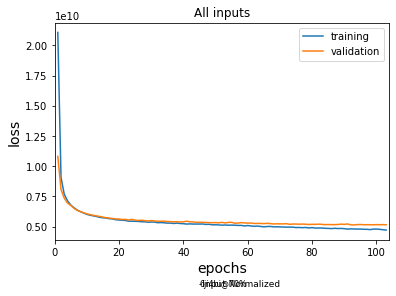

In [ ]:
#plot###

epochs = np.arange(1,len(rnn_hist.history['loss'])+1)
plt.plot(epochs,rnn_hist.history['loss'],label='training')
plt.plot(epochs,rnn_hist.history['val_loss'],label='validation')
plt.xlim([0, len(rnn_hist.history['loss'])+1])
plt.xlabel('epochs',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.legend()
plt.text(45,1.*1e7, r'6ji4bi@70%', fontsize=8)
plt.text(45,0.8*1e7, r'-Input Normalized', fontsize=9)
plt.title('All inputs')
plt.show()

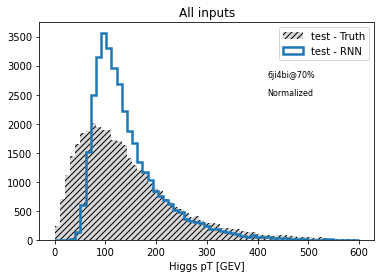

In [ ]:
plt.xlabel('Higgs pT [GEV]')
plt.hist(Y_test_01/1000, bins=np.linspace(0,600,60), color='gray', alpha=0.3, fill='tozeroy', hatch = '////',linewidth=2, label='test - Truth')
#plt.hist(X_test_best_higgs_pt_withH/1000, bins=np.linspace(0,600,60),histtype='step', linewidth=2.5, label='test - RecoBDT')
plt.hist(ypred/1000, bins=np.linspace(0,600,60),histtype='step', linewidth=2.5, label='test - RNN')
plt.text(420,2800, r'6ji4bi@70%', fontsize=8)
plt.text(420,2500, r'Normalized', fontsize=8)
plt.title('All inputs')
plt.legend()
plt.show()

In [ ]:
plt.xlabel('Higgs pT [GEV]')
plt.hist(Y_train_01/1000, bins=np.linspace(0,600,60), color='gray', alpha=0.3, fill='tozeroy', hatch = '////',linewidth=2, label='train - Truth')
#plt.hist(X_train_best_higgs_pt_withH/1000, bins=np.linspace(0,600,60),histtype='step', linewidth=2.5, label='train - RecoBDT')
plt.hist(ypred_train/1000, bins=np.linspace(0,600,60),histtype='step', linewidth=2.5, label='train - RNN')
plt.text(420,2700, r'6ji4bi@70%', fontsize=8)
plt.text(420,2500, r'Normalized', fontsize=8)
plt.title('All inputs')
plt.legend()
plt.show()

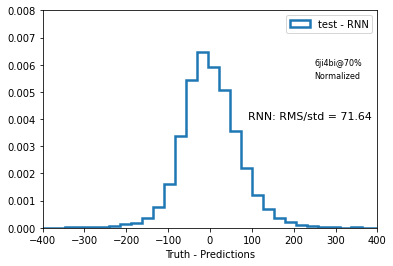

In [ ]:
sample2a = Y_test_01/1000-(ypred/1000)
plt.xlabel('Truth - Predictions')

plt.hist(sample2a, bins=50, density=True, histtype='step',linewidth=2.5,label='test - RNN')

rms2a = np.sqrt(np.mean(sample2a**2))

plt.title('')
plt.xlim([-400, 400])
plt.ylim([0, 0.008])
plt.text(250,0.006, r'6ji4bi@70%', fontsize=8)
plt.text(250,0.0055, r'Normalized', fontsize=8)
plt.text(90,0.004, r"RNN: RMS/std = %.2f" % (rms2a), fontsize=11)

plt.legend()
plt.show()

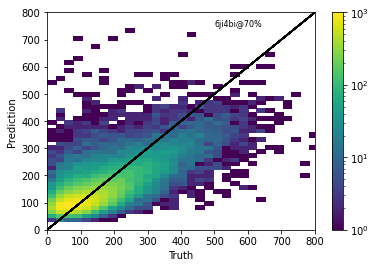

In [ ]:
##2D scatter plot

ypred1a = ypred/1000
Y_test1a = Y_test_01/1000

plt.hist2d(Y_test1a,ypred1a, bins = 50,norm=mpl.colors.LogNorm())
plt.xlim([0, 800])
plt.ylim([0, 800])
plt.text(500,750, r'6ji4bi@70%', fontsize=8)
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.plot(Y_test1a,Y_test1a,'k-')
plt.colorbar()


plt.show()

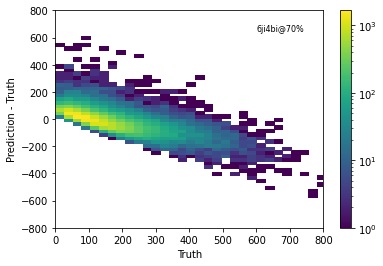

In [ ]:
plt.hist2d(Y_test_01/1000, ypred/1000 - Y_test_01/1000, bins = 50,norm=mpl.colors.LogNorm())
plt.xlim([0, 800])
plt.ylim([-800, 800])
plt.text(600,650, r'6ji4bi@70%', fontsize=8)
plt.xlabel('Truth')
plt.ylabel('Prediction - Truth')
plt.colorbar()
plt.show()

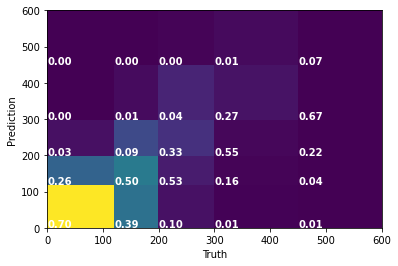

In [ ]:
bins_list = [0, 120, 200, 300, 450, 600]

x1a = np.array(ypred/1000) # create random data points
y1a = np.array(Y_test_01/1000)

fig, ax = plt.subplots()
hist1a, xbins1a, ybins1a, im = ax.hist2d(x1a, y1a, bins=bins_list)
hist1a *= 1 / hist1a.sum(axis=0)

for j in range(len(ybins1a)-1):
    for i in range(len(xbins1a)-1):
       ax.text(xbins1a[j]+0.5,ybins1a[i]+0.5, r"%.2f" %(hist1a.T[j,i]), 
                color="w", fontweight="bold")
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [ ]:
def compute_profile(x, y, nbin=(100,100)):
    
    # use of the 2d hist by numpy to avoid plotting
    h, xe, ye = np.histogram2d(x,y,nbin)
    
    # bin width
    xbinw = xe[1]-xe[0]

    # getting the mean and RMS values of each vertical slice of the 2D distribution
    # also the x valuse should be recomputed because of the possibility of empty slices
    x_array      = []
    x_slice_mean = []
    x_slice_rms  = []
    for i in range(xe.size-1):
        yvals = y[ (x>xe[i]) & (x<=xe[i+1]) ]
        if yvals.size>0: # do not fill the quanties for empty slices
            x_array.append(xe[i]+ xbinw/2)
            x_slice_mean.append( yvals.mean())
            x_slice_rms.append( yvals.std())
    x_array = np.array(x_array)
    x_slice_mean = np.array(x_slice_mean)
    x_slice_rms = np.array(x_slice_rms)

    return x_array, x_slice_mean, x_slice_rms

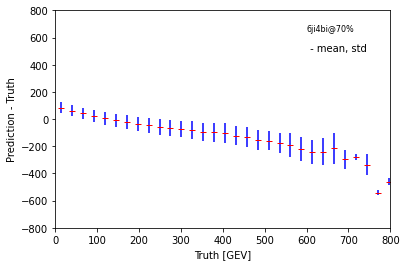

In [ ]:
#compute the profile
p_xa, p_meana, p_rmsa = compute_profile(Y_test_01/1000, ypred/1000 - Y_test_01/1000,(50,50))

plt.errorbar(p_xa, p_meana, p_rmsa, fmt='_', ecolor='b', color='r')
plt.text(600,650, r'6ji4bi@70%', fontsize=8)
plt.text(600,500, r' - mean, std', fontsize=10)
plt.xlim([0, 800])
plt.ylim([-800, 800])
plt.xlabel('Truth [GEV]')
plt.ylabel('Prediction - Truth')
plt.show()